<a href="https://colab.research.google.com/github/kmuppalla/ML/blob/main/randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression

In [3]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import data
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Mean and std deviation are way high. Data has to be scaled.
#Use robust scaler to scale Time and Amount
columns_to_scale = ['Time', 'Amount']

df_to_scale = df[columns_to_scale]
scaler = RobustScaler()
df_scaled_subset = scaler.fit_transform(df_to_scale)

# Convert the scaled array back to a DataFrame
df_scaled_subset = pd.DataFrame(df_scaled_subset, columns=columns_to_scale)

# Update the original DataFrame with the scaled values
df[columns_to_scale] = df_scaled_subset

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.927124,0.001727
std,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


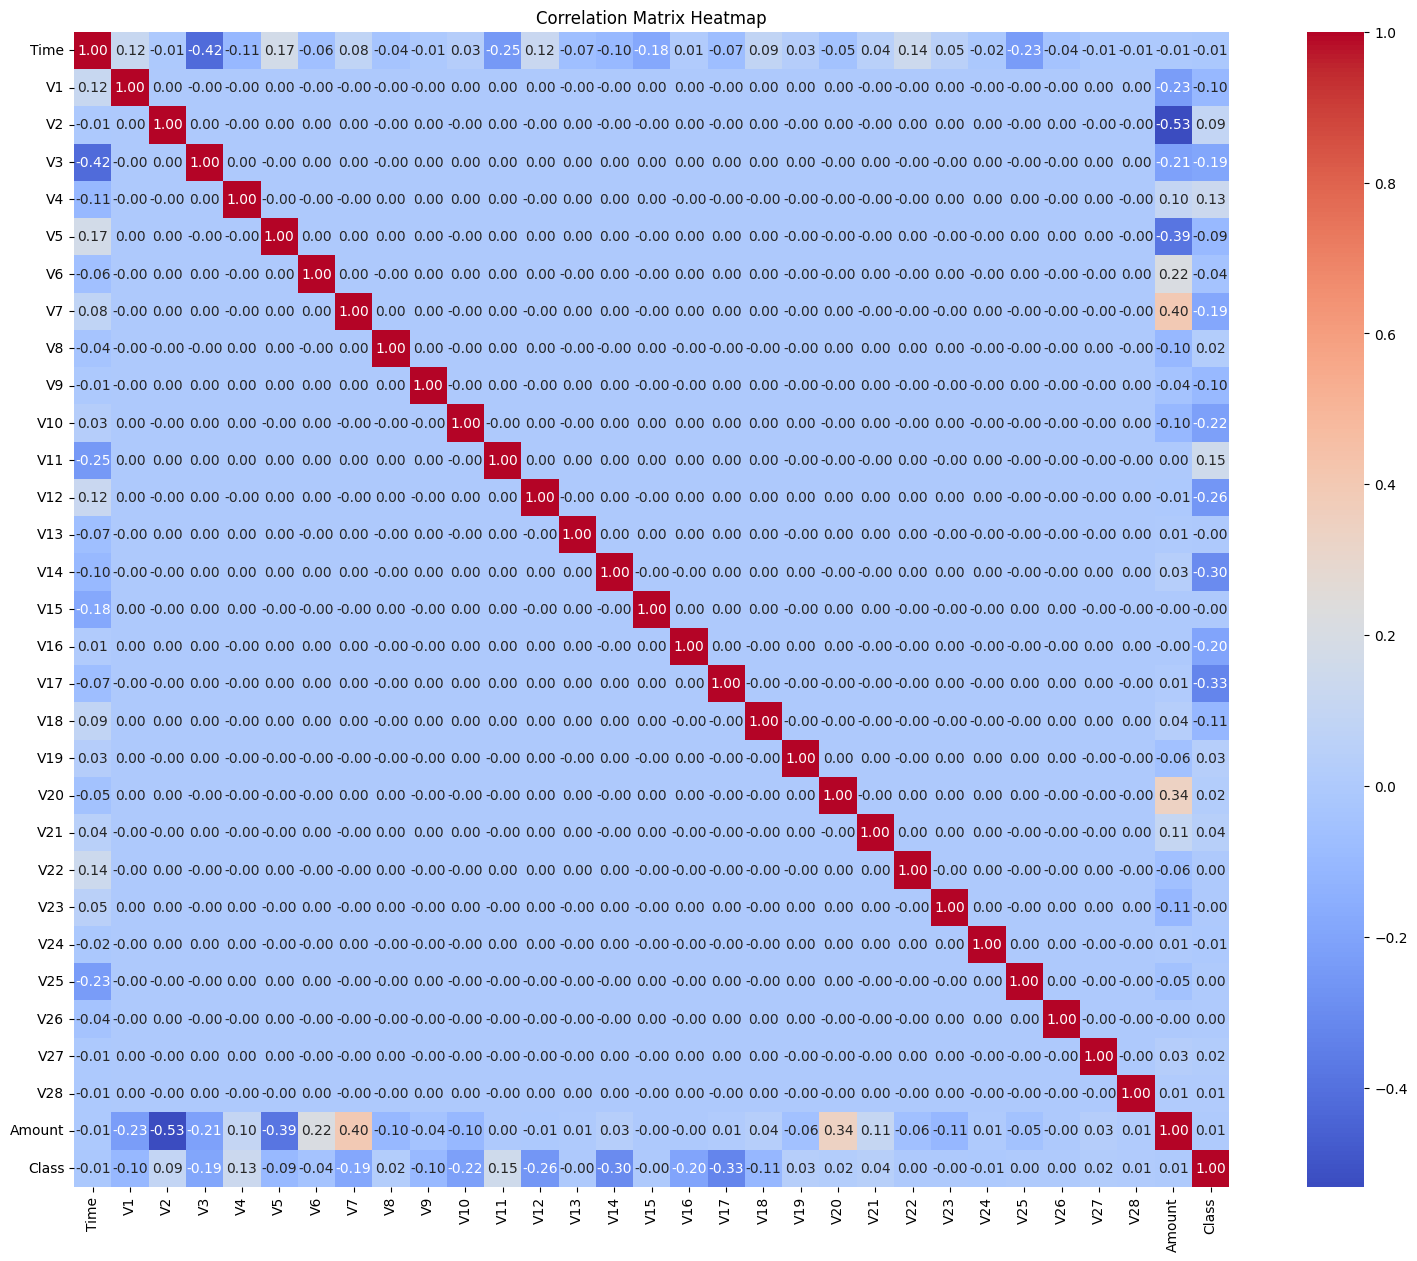

In [8]:
#Plot correlation matrix to check correlation between features
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [9]:
# No significant correlations

In [10]:
#split df to train and test
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


In [11]:
# param_grid = {
#     'n_estimators': [50],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

In [12]:
# apply randomForest classifier with random n_estimators. This is because the GridSearchCV is taking lot of time to run and tune hyper parameters
# rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42)

In [13]:
# stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

In [14]:
%time
rf_classifier.fit(X, y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


RandomForestClassifier(n_estimators=50, random_state=42)

In [15]:
pred=rf_classifier.predict(X_test)

In [16]:
recall = recall_score(y_test, pred)
recall

0.9897959183673469

In [17]:
#High recall score. Need to check if this is overfitting. Lets tune for logistic regression with GridSearchCV first and check the recall score for logistic regression

In [18]:
logreg_model = LogisticRegression(random_state=42)

In [19]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [20]:
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=stratified_cv, scoring='recall')

In [ ]:
%timeit
grid_search.fit(X_train, y_train)

In [23]:
best_logreg_model = grid_search.best_estimator_

In [24]:
best_logreg_model

LogisticRegression(C=0.1, random_state=42)

In [25]:
#Best C value is 0.1. Using that for predictions on X_test and then comparing predicted values and y_test for recall score

In [26]:
y_pred = best_logreg_model.predict(X_test)

In [27]:
recall = recall_score(y_test, y_pred)
recall

0.5714285714285714

In [43]:
#0.57. Very low recall score. Need to debug this. Lets try undersampling and check recall score for logistic

In [29]:
#Undersampling
majority_class = df[df['Class'] == 0]
minority_class = df[df['Class'] == 1]

# Undersample majority class without replacement
undersampled_majority = majority_class.sample(n=len(minority_class), replace=False, random_state=42)

# Combine minority class with undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

In [30]:
#Diiferent split of df so as not to confuse
A = undersampled_df.drop('Class', axis=1)
b = undersampled_df['Class']

In [31]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [32]:
param_grid_undersampled= {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [33]:
stratified_cv_undersampled = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
logreg_model = LogisticRegression(random_state=42)

In [35]:
grid_search_undersampled = GridSearchCV(estimator=logreg_model, param_grid=param_grid_undersampled, cv=stratified_cv_undersampled, scoring='recall')

In [ ]:
grid_search_undersampled.fit(A_train, b_train)

In [37]:
best_logreg_model_undersampled = grid_search_undersampled.best_estimator_

In [38]:
best_logreg_model_undersampled

LogisticRegression(C=1, random_state=42)

In [39]:
#C = 1

In [40]:
b_pred = best_logreg_model_undersampled.predict(A_test)

In [41]:
recall_undersampled = recall_score(b_test, b_pred)
recall_undersampled

0.8775510204081632

In [44]:
#0.87. Better recall score but still less.

In [47]:
#Lets try with RadomizedSearchCV
rf_randomSearch = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [48]:
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='recall',  # Scoring metric
    random_state=42,
    n_jobs=-1  # Use all available cores for parallel processing
)

In [49]:
random_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Best parameters for RandomSearch rF :", random_search.best_params_)

In [ ]:
y_pred = random_search.best_estimator_.predict(X_test)

In [ ]:
recall_score_randomsearch = recall_score(y_test, y_pred)

In [ ]:
recarecall_score_randomsearch